In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
mc=pd.read_csv('micro_credit.csv', parse_dates=['pdate'])
mc.head(10)

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-10-08
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
5,6,1,35819I70783,568.0,2257.362667,2261.460000,368.13,380.13,2.0,0.0,...,6.0,0.0,3.0,18,6,0.0,11.000000,8.333333,UPW,2016-02-07
6,7,1,96759I84459,545.0,2876.641667,2883.970000,335.75,402.90,13.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-05-07
7,8,1,09832I90846,768.0,12905.000000,17804.150000,900.35,2549.11,4.0,55.0,...,6.0,0.0,7.0,42,6,0.0,6.000000,3.857143,UPW,2016-05-08
8,9,1,59772I84450,1191.0,90.695000,90.695000,2287.50,2287.50,1.0,0.0,...,6.0,0.0,4.0,24,6,0.0,2.666667,2.666667,UPW,2016-06-15
9,10,1,56331I70783,536.0,29.357333,29.357333,612.96,612.96,11.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-06


In [4]:
mr=mc.drop(['Unnamed: 0', 'pcircle', 'msisdn'],axis=1)

In [5]:
mr

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,...,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,2016-07-20
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,...,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,2016-10-08
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,...,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,2016-08-19
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,...,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,2016-06-06
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,...,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,...,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,2016-06-17
209589,1,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,...,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,2016-12-06
209590,1,1013.0,11843.111670,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,...,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,2016-07-29
209591,1,1732.0,12488.228330,12574.370000,411.83,984.58,2.0,38.0,773,5,...,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,2016-07-25


In [6]:
mr.dtypes

label                            int64
aon                            float64
daily_decr30                   float64
daily_decr90                   float64
rental30                       float64
rental90                       float64
last_rech_date_ma              float64
last_rech_date_da              float64
last_rech_amt_ma                 int64
cnt_ma_rech30                    int64
fr_ma_rech30                   float64
sumamnt_ma_rech30              float64
medianamnt_ma_rech30           float64
medianmarechprebal30           float64
cnt_ma_rech90                    int64
fr_ma_rech90                     int64
sumamnt_ma_rech90                int64
medianamnt_ma_rech90           float64
medianmarechprebal90           float64
cnt_da_rech30                  float64
fr_da_rech30                   float64
cnt_da_rech90                    int64
fr_da_rech90                     int64
cnt_loans30                      int64
amnt_loans30                     int64
maxamnt_loans30          

In [7]:
mr.isnull().sum()

label                   0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pdate                   0
dtype: int64

In this we can clearly see that two columns are in object type and one column pdate is in datetime type so 
we need to convert them into float or int type that is numerical value by using LabelEncoder or onehotencoder.
we area going to use label encoderas it converts more than two variable without any constraints.

In [10]:
df=pd.DataFrame()
df['Day']=mr['pdate'].dt.day_name()
df['Month']=mr['pdate'].dt.month_name()
df['Year']=mr['pdate'].dt.year

In [11]:
df

,Day,Month,Year
0,Wednesday,July,2016
1,Saturday,October,2016
2,Friday,August,2016
3,Monday,June,2016
4,Wednesday,June,2016
...,...,...,...
209588,Friday,June,2016
209589,Tuesday,December,2016
209590,Friday,July,2016
209591,Monday,July,2016


In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Day']=le.fit_transform(df['Day'])
df['Month']=le.fit_transform(df['Month'])
df['Year']=le.fit_transform(df['Year'])

In [17]:
df

,Day,Month,Year
0,6,5,0
1,2,10,0
2,0,1,0
3,1,6,0
4,6,6,0
...,...,...,...
209588,0,6,0
209589,5,2,0
209590,0,5,0
209591,1,5,0


In [18]:
df_1=pd.concat([mr,df], axis=1)
df_1

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate,Day,Month,Year
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,...,2.0,12,6,0.0,29.000000,29.000000,2016-07-20,6,5,0
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,...,1.0,12,12,0.0,0.000000,0.000000,2016-10-08,2,10,0
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,...,1.0,6,6,0.0,0.000000,0.000000,2016-08-19,0,1,0
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,...,2.0,12,6,0.0,0.000000,0.000000,2016-06-06,1,6,0
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,...,7.0,42,6,0.0,2.333333,2.333333,2016-06-22,6,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,...,2.0,12,6,0.0,1.000000,1.000000,2016-06-17,0,6,0
209589,1,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,...,3.0,18,6,0.0,1.000000,1.000000,2016-12-06,5,2,0
209590,1,1013.0,11843.111670,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,...,6.0,54,12,0.0,4.000000,3.833333,2016-07-29,0,5,0
209591,1,1732.0,12488.228330,12574.370000,411.83,984.58,2.0,38.0,773,5,...,3.0,24,12,0.0,0.000000,10.500000,2016-07-25,1,5,0


In [19]:
df_new=df_1.drop('pdate', axis=1)
df_new

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Day,Month,Year
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,...,0.0,2.0,12,6,0.0,29.000000,29.000000,6,5,0
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,...,0.0,1.0,12,12,0.0,0.000000,0.000000,2,10,0
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,...,0.0,1.0,6,6,0.0,0.000000,0.000000,0,1,0
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,...,0.0,2.0,12,6,0.0,0.000000,0.000000,1,6,0
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,...,0.0,7.0,42,6,0.0,2.333333,2.333333,6,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,...,0.0,2.0,12,6,0.0,1.000000,1.000000,0,6,0
209589,1,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,...,0.0,3.0,18,6,0.0,1.000000,1.000000,5,2,0
209590,1,1013.0,11843.111670,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,...,0.0,6.0,54,12,0.0,4.000000,3.833333,0,5,0
209591,1,1732.0,12488.228330,12574.370000,411.83,984.58,2.0,38.0,773,5,...,0.0,3.0,24,12,0.0,0.000000,10.500000,1,5,0


In [20]:
df_new.dtypes

label                     int64
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_loans90           int64
medianamnt_loans90      float64
payback3

In [23]:
len(df_new.loc[(df_new.aon>6000)|(df_new.aon<0)])

3628

In [26]:
df_2=df_new.loc[~(df_new.aon>6000)|(df_new.aon<0)]
df_2

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Day,Month,Year
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,...,0.0,2.0,12,6,0.0,29.000000,29.000000,6,5,0
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,...,0.0,1.0,12,12,0.0,0.000000,0.000000,2,10,0
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,...,0.0,1.0,6,6,0.0,0.000000,0.000000,0,1,0
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,...,0.0,2.0,12,6,0.0,0.000000,0.000000,1,6,0
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,...,0.0,7.0,42,6,0.0,2.333333,2.333333,6,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,...,0.0,2.0,12,6,0.0,1.000000,1.000000,0,6,0
209589,1,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,...,0.0,3.0,18,6,0.0,1.000000,1.000000,5,2,0
209590,1,1013.0,11843.111670,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,...,0.0,6.0,54,12,0.0,4.000000,3.833333,0,5,0
209591,1,1732.0,12488.228330,12574.370000,411.83,984.58,2.0,38.0,773,5,...,0.0,3.0,24,12,0.0,0.000000,10.500000,1,5,0


In [27]:
df_2.shape

(207504, 36)

In [25]:
df_new.shape

(209593, 36)

In [29]:
len(df_2.loc[(df_2.daily_decr30<0)|(df_2.daily_decr90<0)|(df_2.daily_decr30>150000)|(df_2.daily_decr90>150000)])

1851

In [32]:
df_3=(df_2.loc[~((df_2.daily_decr30<0)|(df_2.daily_decr90<0)|(df_2.daily_decr30>150000)|(df_2.daily_decr90>150000))])
df_3.shape

(205653, 36)

In [33]:
df_2.shape

(207504, 36)

In [40]:
(df_3.sumamnt_ma_rech30 < df_3.sumamnt_ma_rech90).value_counts()

True     120963
False     84690
dtype: int64

we can't eliminate this data as this is more than 10%

In [41]:
df_3.isnull().sum()

label                   0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
Day                     0
Month                   0
Year                    0
dtype: int64

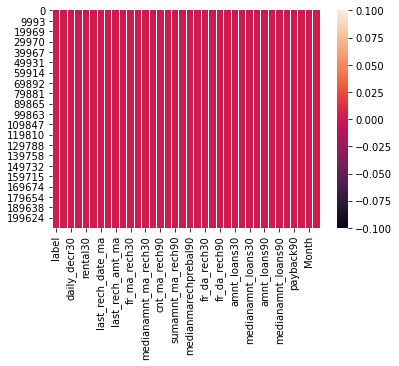

In [42]:
sns.heatmap(df_3.isnull())

In [45]:
df_4=df_3.drop('Year', axis=1)

In [46]:
df_4.corr()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Day,Month
label,1.000000,0.080131,0.164324,0.163208,0.050707,0.068106,0.002980,0.000857,0.120723,0.227631,...,0.000538,0.041379,0.004638,0.192821,0.079639,0.032750,0.042158,0.042417,-0.020016,-0.047847
aon,0.080131,1.000000,0.058588,0.059923,0.065660,0.068842,-0.002008,0.001674,0.093431,-0.003322,...,-0.001578,-0.000677,0.005051,0.062788,0.037115,-0.005673,0.018841,0.036662,-0.009038,-0.018249
daily_decr30,0.164324,0.058588,1.000000,0.977351,0.440277,0.458200,0.000851,-0.001539,0.273097,0.447148,...,0.000237,-0.012228,0.008293,0.562688,0.403798,-0.038172,0.025475,0.046136,-0.081047,-0.104964
daily_decr90,0.163208,0.059923,0.977351,1.000000,0.433838,0.472555,0.001295,-0.001762,0.261725,0.423531,...,0.000303,-0.006040,0.008586,0.567707,0.401997,-0.035551,0.017966,0.039861,-0.076950,-0.119195
rental30,0.050707,0.065660,0.440277,0.433838,1.000000,0.955144,-0.001102,0.003289,0.123659,0.229683,...,-0.000935,-0.017154,0.004233,0.295873,0.232774,-0.035864,0.071528,0.093861,-0.059666,-0.056544
rental90,0.068106,0.068842,0.458200,0.472555,0.955144,1.000000,-0.001705,0.002854,0.117499,0.226147,...,-0.001488,-0.010328,0.005252,0.324337,0.249464,-0.034573,0.065567,0.098055,-0.063456,-0.077986
last_rech_date_ma,0.002980,-0.002008,0.000851,0.001295,-0.001102,-0.001705,1.000000,0.001869,-0.000100,0.004436,...,0.001000,0.001320,-0.000160,0.000894,-0.001400,0.002184,-0.002150,-0.001470,0.000265,-0.001617
last_rech_date_da,0.000857,0.001674,-0.001539,-0.001762,0.003289,0.002854,0.001869,1.000000,-0.000186,0.001352,...,0.000547,-0.000153,-0.000940,0.000331,0.001238,-0.002532,-0.000227,0.000170,-0.002186,0.001570
last_rech_amt_ma,0.120723,0.093431,0.273097,0.261725,0.123659,0.117499,-0.000100,-0.000186,1.000000,-0.012786,...,0.001334,0.027023,-0.000320,0.008301,0.146954,0.019943,-0.030272,-0.017340,-0.018114,-0.004565
cnt_ma_rech30,0.227631,-0.003322,0.447148,0.423531,0.229683,0.226147,0.004436,0.001352,-0.012786,1.000000,...,0.000325,-0.069019,0.014928,0.686465,0.171528,-0.073320,0.041548,0.014723,-0.023807,0.001688


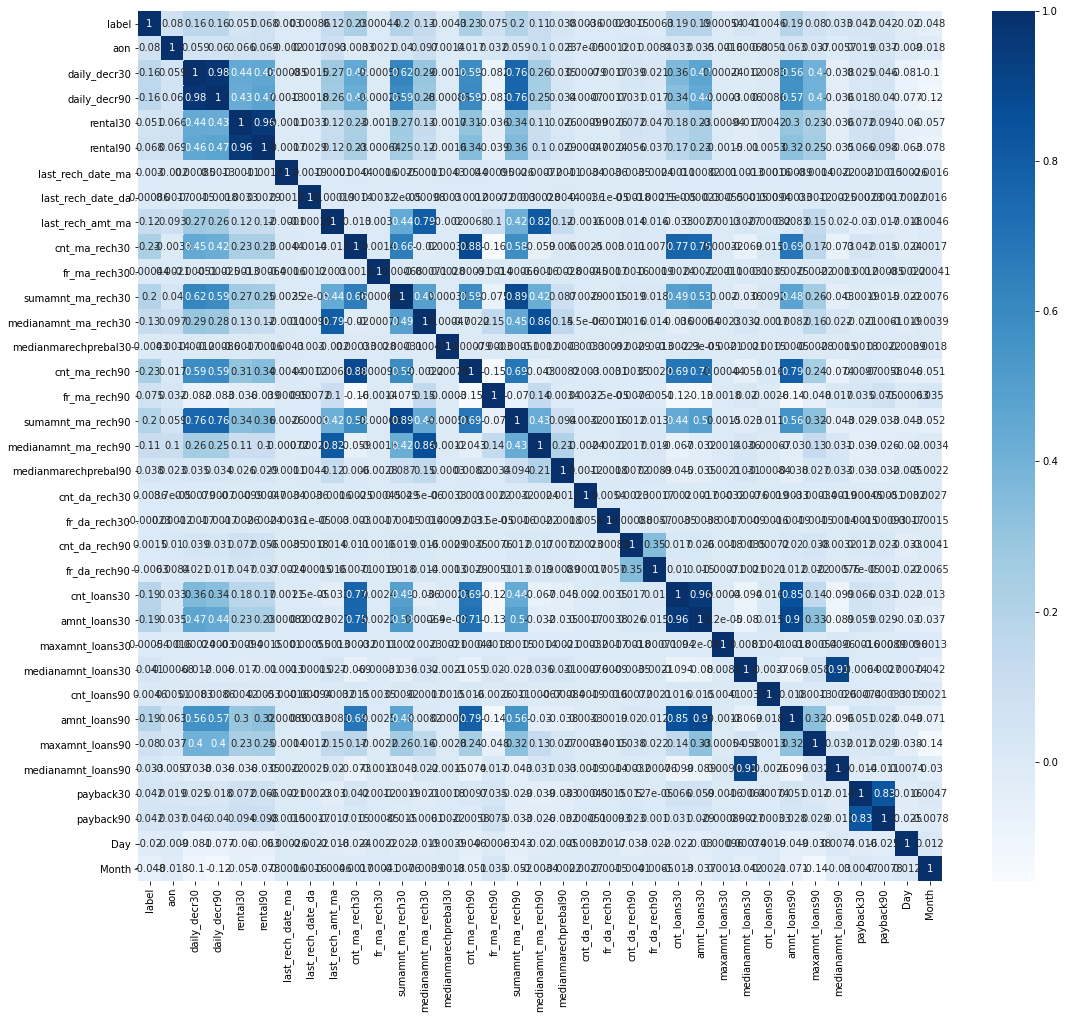

In [59]:
plt.figure(figsize=(18,16))
sns.heatmap(df_4.corr(), annot=True, cmap='Blues')

we are going to plot some graph related to the columns it would help us understand better realtionship between the 
columns. we are going to use the visualisation commands like seaborn and matplotlib to plot distplot, countplot and
catplot and even at the end we are going to use boxplot to understand the outliers present in the data.

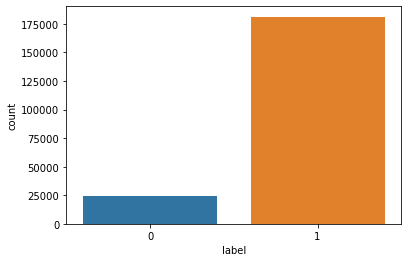

In [60]:
sns.countplot(x='label', data=df_4) 

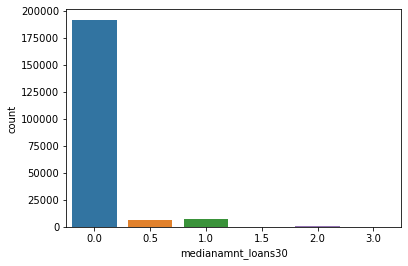

In [61]:
sns.countplot(x='medianamnt_loans30', data=df_4 )

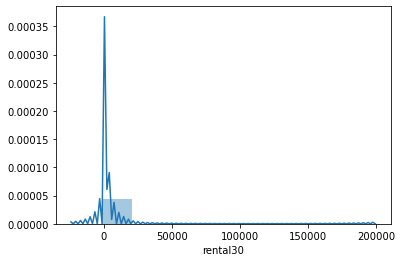

In [62]:
sns.distplot(df_4['rental30'], bins=10)

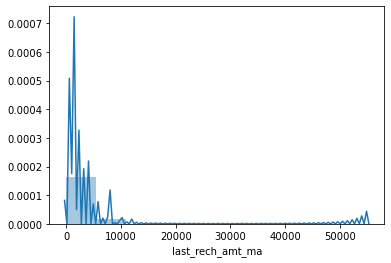

In [63]:
sns.distplot(df_4['last_rech_amt_ma'], bins=10)

We will now look into outliers and remove it, we can easliy look into the mr.describe function we can 
see that there are too many outliers and by using outliers we can see them visually.

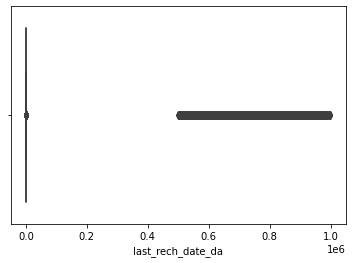

In [64]:
sns.boxplot(df_4['last_rech_date_da'])

{'whiskers': [<matplotlib.lines.Line2D at 0x25e12f2b0d0>,
 'caps': [<matplotlib.lines.Line2D at 0x25e12f2b790>,
 'boxes': [<matplotlib.lines.Line2D at 0x25e12f1dd90>],
 'medians': [<matplotlib.lines.Line2D at 0x25e12f2be80>],
 'fliers': [<matplotlib.lines.Line2D at 0x25e12f34190>],
 'means': []}

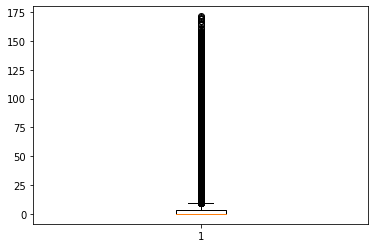

In [65]:
plt.boxplot(df_4['payback30'])

{'whiskers': [<matplotlib.lines.Line2D at 0x25e12f81460>,
 'caps': [<matplotlib.lines.Line2D at 0x25e12f81b20>,
 'boxes': [<matplotlib.lines.Line2D at 0x25e12f81100>],
 'medians': [<matplotlib.lines.Line2D at 0x25e12f8b220>],
 'fliers': [<matplotlib.lines.Line2D at 0x25e12f8b520>],
 'means': []}

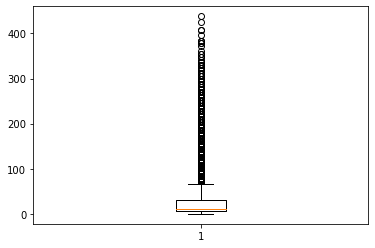

In [66]:
plt.boxplot(df_4['amnt_loans90'])

In [68]:
from scipy.stats import zscore
z=np.abs(zscore(df_4))
mr_n=df_4[(z<3).all(axis=1)]
mr_n

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Day,Month
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,6,5
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,2,10
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,0,1
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,1,6
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,0,6
209589,1,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,5,2
209590,1,1013.0,11843.111670,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,0,5
209591,1,1732.0,12488.228330,12574.370000,411.83,984.58,2.0,38.0,773,5,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,1,5


In [69]:
df_4.shape

(205653, 35)

In [70]:
mr_n.shape

(158922, 35)

Now checking for the outliers again.

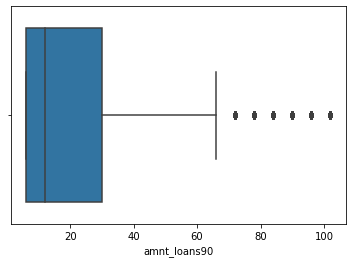

In [71]:
sns.boxplot(mr_n['amnt_loans90'])

Now we will check for the skewness in the data, if any then we will try top remove it,
we want skewness of any column to be arounf 0.5. we are going to plot histogram to check if the data is normally 
distributed or is right skewed or left skewed.

In [72]:
mr_n.skew()

label                   -2.182002
aon                      0.905793
daily_decr30             1.937760
daily_decr90             2.046287
rental30                 2.189519
rental90                 2.239484
last_rech_date_ma        3.088581
last_rech_date_da       10.344553
last_rech_amt_ma         2.130538
cnt_ma_rech30            1.172731
fr_ma_rech30             1.992973
sumamnt_ma_rech30        1.620114
medianamnt_ma_rech30     2.334104
medianmarechprebal30    10.565562
cnt_ma_rech90            1.317610
fr_ma_rech90             1.970537
sumamnt_ma_rech90        1.683148
medianamnt_ma_rech90     2.384063
medianmarechprebal90     3.662814
cnt_da_rech30           50.680254
fr_da_rech30             0.000000
cnt_da_rech90            6.898179
fr_da_rech90             0.000000
cnt_loans30              1.454296
amnt_loans30             1.430461
maxamnt_loans30         53.744851
medianamnt_loans30       5.328359
cnt_loans90              1.699728
amnt_loans90             1.685761
maxamnt_loans9

(array([1.58858e+05, 0.00000e+00, 0.00000e+00, 1.00000e+00, 9.00000e+00,
        7.00000e+00, 1.10000e+01, 1.30000e+01, 1.00000e+01, 1.30000e+01]),
 array([    0.      ,  1298.461733,  2596.923466,  3895.385199,
         5193.846932,  6492.308665,  7790.770398,  9089.232131,
        10387.693864, 11686.155597, 12984.61733 ]),
 <a list of 10 Patch objects>)

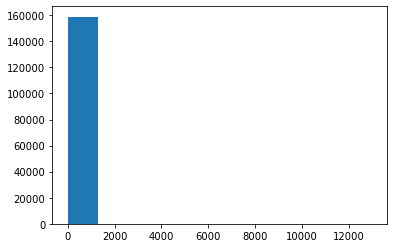

In [73]:
plt.hist(mr_n['maxamnt_loans30'])

(array([106463.,  19824.,  12472.,   7882.,   4964.,   3183.,   1972.,
          1181.,    687.,    294.]),
 array([    0.   ,  3805.469,  7610.938, 11416.407, 15221.876, 19027.345,
        22832.814, 26638.283, 30443.752, 34249.221, 38054.69 ]),
 <a list of 10 Patch objects>)

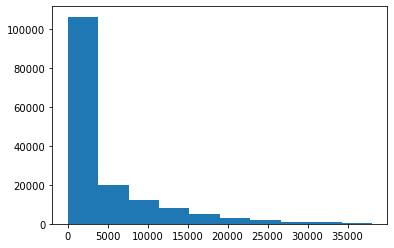

In [74]:
plt.hist(mr_n['daily_decr90'], bins=10)

(array([4.00000e+00, 5.00000e+00, 1.56243e+05, 7.86000e+02, 6.95000e+02,
        5.34000e+02, 2.93000e+02, 1.39000e+02, 1.17000e+02, 1.06000e+02]),
 array([-29. , -14.6,  -0.2,  14.2,  28.6,  43. ,  57.4,  71.8,  86.2,
        100.6, 115. ]),
 <a list of 10 Patch objects>)

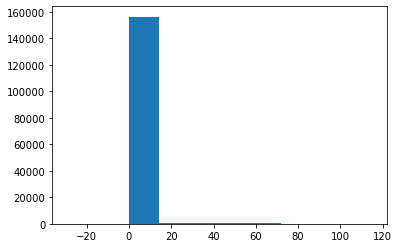

In [75]:
plt.hist(mr_n['last_rech_date_da']) 

In [ ]:
Data has the columns which has many different units which needs to be converted in same unit by using standard scaler function

In [78]:
x=mr_n.drop('label', axis=1)
y=mr_n['label']

In [79]:
from sklearn.preprocessing import StandardScaler
sd=StandardScaler()
x=sd.fit_transform(x)

In [80]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
max_scr=0
for r_state in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state, test_size=0.2)
    lg=LogisticRegression()
    lg.fit(x_train,y_train)
    y_pred=lg.predict(x_test)
    acc_scr=accuracy_score(y_test,y_pred)
    if acc_scr>max_scr:
        max_scr=acc_scr
        final_rstate=r_state
        
print('The corresponding value for maximum rstate',final_rstate, 'to the acc Score is', max_scr)

The corresponding value for maximum rstate 73 to the acc Score is 0.8749724712914897


In [82]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=73, test_size=0.2)
lg=LogisticRegression()
lg.fit(x_train,y_train)
y_pred=lg.predict(x_test)
print('Accuracy score',accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Confusion matrix',confusion_matrix(y_test,y_pred))

Accuracy score 0.8749724712914897
              precision    recall  f1-score   support

           0       0.56      0.09      0.16      4049
           1       0.88      0.99      0.93     27736

    accuracy                           0.87     31785
   macro avg       0.72      0.54      0.54     31785
weighted avg       0.84      0.87      0.83     31785

Confusion matrix [[  371  3678]
 [  296 27440]]


In [83]:
from sklearn.model_selection import cross_val_score
cross_val_scr=cross_val_score(lg,x,y, scoring='accuracy', cv=5).mean()
cross_val_scr

0.8708926428474791

In [84]:
pip install imblearn

In [85]:
from imblearn.over_sampling import SMOTE

In [86]:
y_train.value_counts()

1    110302
0     16835
Name: label, dtype: int64

In [87]:
smt = SMOTE()
x_smote_train, y_smote_train = smt.fit_sample(x_train, y_train)

In [88]:
np.bincount(y_smote_train)

array([110302, 110302], dtype=int64)

In [89]:
x_smote_train,x_test,y_smote_train,y_test=train_test_split(x,y,random_state=73, test_size=0.2)
lg=LogisticRegression()
lg.fit(x_smote_train,y_smote_train)
y_pred=lg.predict(x_test)
acc_scr=accuracy_score(y_test,y_pred)
acc_scr

0.8749724712914897

In [109]:
from sklearn.decomposition import PCA
pca = PCA()
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

In [110]:
explained_variance =pca.explained_variance_ratio_

In [111]:
explained_variance

array([2.35173286e-01, 1.08484901e-01, 6.27347153e-02, 6.18013585e-02,
       5.47277914e-02, 5.27214439e-02, 4.71545383e-02, 3.55101528e-02,
       3.41497352e-02, 3.39861942e-02, 3.33707214e-02, 3.18224733e-02,
       3.12090315e-02, 2.83568320e-02, 2.72067902e-02, 2.35364845e-02,
       1.94093205e-02, 1.81216499e-02, 9.24648471e-03, 9.12338581e-03,
       8.17173103e-03, 6.76538574e-03, 6.27244300e-03, 5.81769026e-03,
       5.64752035e-03, 3.88849014e-03, 2.65638786e-03, 1.36492541e-03,
       7.48550082e-04, 4.58709039e-04, 3.52742556e-04, 8.13476895e-06,
       1.88504257e-33, 1.88504257e-33])

In [90]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.56      0.09      0.16      4049
           1       0.88      0.99      0.93     27736

    accuracy                           0.87     31785
   macro avg       0.72      0.54      0.54     31785
weighted avg       0.84      0.87      0.83     31785



In [91]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [92]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc

In [93]:
x_smote_train,x_test,y_smote_train,y_test=train_test_split(x,y,random_state= 65, test_size=0.2)
knn=KNeighborsClassifier()
knn.fit(x_smote_train,y_smote_train)
y_pred=knn.predict(x_test)
acc_scr=accuracy_score(y_test,y_pred)
acc_scr

0.8711027214094699

In [94]:
print(classification_report(y_test,y_pred))
print('\n')
cms=confusion_matrix(y_test,y_pred)
print('Confusion_matrix',cms)

              precision    recall  f1-score   support

           0       0.52      0.35      0.42      4204
           1       0.91      0.95      0.93     27581

    accuracy                           0.87     31785
   macro avg       0.71      0.65      0.67     31785
weighted avg       0.85      0.87      0.86     31785



Confusion_matrix [[ 1481  2723]
 [ 1374 26207]]


In [95]:
false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,y_pred)
roc_auc=auc(false_positive_rate,true_positive_rate)
print('roc_auc_score',roc_auc)

roc_auc_score 0.6512333182728869


No handles with labels found to put in legend.


AxesSubplot(0.125,0.808774;0.62x0.0712264)


Text(0.5, 0, 'False_positive_rate')

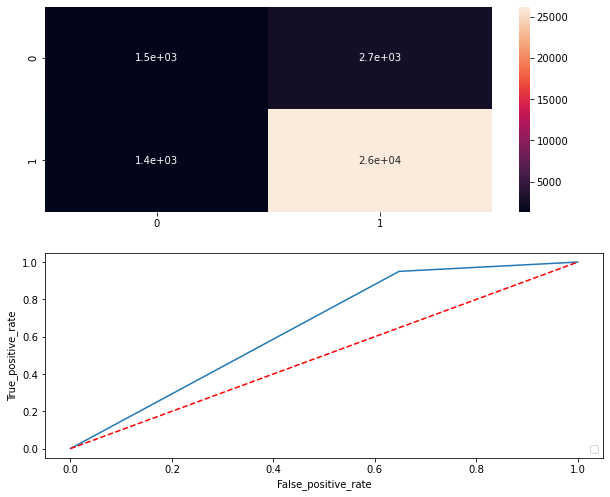

In [96]:
plt.figure(figsize=(10,40))
plt.subplot(911)
print(sns.heatmap(cms,annot=True))
plt.subplot(912)
plt.plot(false_positive_rate,true_positive_rate)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True_positive_rate')
plt.xlabel('False_positive_rate')

In [98]:
x_smote_train,x_test,y_smote_train,y_test=train_test_split(x,y,random_state=73, test_size=0.2)
dtc=DecisionTreeClassifier()
dtc.fit(x_smote_train,y_smote_train)
y_pred=dtc.predict(x_test)
acc_scr=accuracy_score(y_test,y_pred)
acc_scr

0.8679565832940066

In [99]:
false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,y_pred)
roc_auc=auc(false_positive_rate,true_positive_rate)
print('roc_auc_score',roc_auc)

roc_auc_score 0.7128925707672589


No handles with labels found to put in legend.


AxesSubplot(0.125,0.808774;0.62x0.0712264)


Text(0.5, 0, 'False_positive_rate')

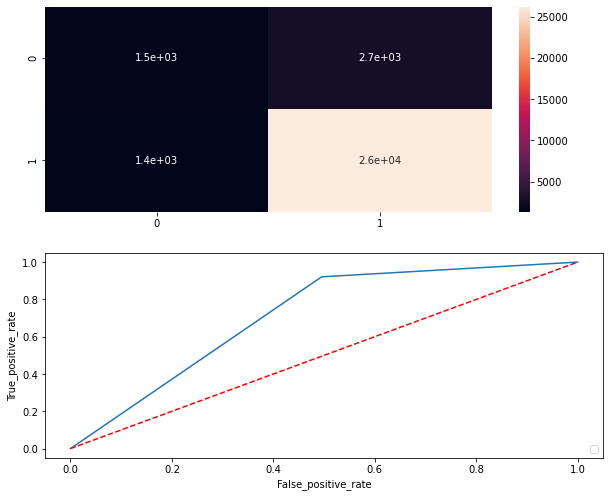

In [100]:
plt.figure(figsize=(10,40))
plt.subplot(911)
print(sns.heatmap(cms,annot=True))
plt.subplot(912)
plt.plot(false_positive_rate,true_positive_rate)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True_positive_rate')
plt.xlabel('False_positive_rate')

In [101]:
print(classification_report(y_test,y_pred))
print('\n')
cms=confusion_matrix(y_test,y_pred)
print('Confusion_matrix',cms)

              precision    recall  f1-score   support

           0       0.48      0.50      0.49      4049
           1       0.93      0.92      0.92     27736

    accuracy                           0.87     31785
   macro avg       0.70      0.71      0.71     31785
weighted avg       0.87      0.87      0.87     31785



Confusion_matrix [[ 2044  2005]
 [ 2192 25544]]


In [102]:
x_smote_train,x_test,y_smote_train,y_test=train_test_split(x,y,random_state=73, test_size=0.2)
gnb=GaussianNB()
gnb.fit(x_smote_train,y_smote_train)
y_pred=gnb.predict(x_test)
acc_scr=accuracy_score(y_test,y_pred)
acc_scr

0.6373761208117036

In [103]:
print(classification_report(y_test,y_pred))
print('\n')
cms=confusion_matrix(y_test,y_pred)
print('Confusion_matrix',cms)

              precision    recall  f1-score   support

           0       0.24      0.84      0.37      4049
           1       0.96      0.61      0.75     27736

    accuracy                           0.64     31785
   macro avg       0.60      0.73      0.56     31785
weighted avg       0.87      0.64      0.70     31785



Confusion_matrix [[ 3416   633]
 [10893 16843]]


In [104]:
false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,y_pred)
roc_auc=auc(false_positive_rate,true_positive_rate)
print('roc_auc_score',roc_auc)

roc_auc_score 0.7254632117606338


No handles with labels found to put in legend.


AxesSubplot(0.125,0.808774;0.62x0.0712264)


Text(0.5, 0, 'False_positive_rate')

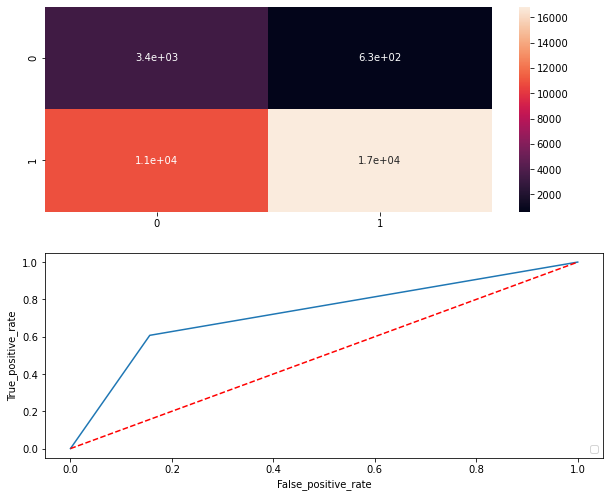

In [105]:
plt.figure(figsize=(10,40))
plt.subplot(911)
print(sns.heatmap(cms,annot=True))
plt.subplot(912)
plt.plot(false_positive_rate,true_positive_rate)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True_positive_rate')
plt.xlabel('False_positive_rate')

In [107]:
df1=pd.DataFrame(y_pred)
df1.to_csv('dtc_micro_credit.csv')

In [108]:
import joblib
joblib.dump(gnb,'gnb_Loan_Fraud.pkl')

['gnb_Loan_Fraud.pkl']

We have selected Guassian NB as our final model because of better recall score for both